# Predicting Employee Promotion (Notebook 2)
This project aims to predict which employees are most likely to be promoted based on a dataset that includes various features such as performance metrics, work experience, and other relevant factors. The dataset, hr_data.csv, contains detailed information on employees, including personal information, education background, past performance, and more. 

This is an improved version of my Machine Learning assignment, which was part of my Diploma of Information Technology Machine Learning course at Polytechnic. This second notebook focuses on choosing and optimizing machine learning models. It utilizes the cleaned data from the hr_data_new.csv file generated in the first notebook.

In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import random
import statsmodels.api as sm
%matplotlib inline

#for models (splitting, evaluating)
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate #(for cross-validation)

from sklearn.linear_model import LogisticRegression #for logistic regression
from sklearn.linear_model import LinearRegression #for linear regression
from sklearn import tree #for decision tree
from sklearn.neural_network import MLPClassifier, MLPRegressor #for artificial neural network
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier #for ensemble learning
from sklearn. ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier #for ensemble learning

### 1.1 Load & Sample the data

In [4]:
df_hr = pd.read_csv('hr_data_new.csv') #read csv file
df_hr_new = df_hr.copy()
df_hr_new.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,1,7,1,1,1,0,0.825812,1.0,0.212121,1,0,0.489796,0
1,2,22,2,2,2,0,0.775995,1.0,0.090909,0,0,0.602041,0
2,1,19,2,2,1,0,0.816444,0.5,0.181818,0,0,0.500000,0
3,1,1,1,1,1,1,0.000000,0.0,0.000000,1,1,0.000000,1
4,3,26,2,2,2,0,0.907030,0.5,0.030303,0,0,0.734694,0


In [5]:
df_hr_new.shape

(54808, 13)

In [6]:
df_hr_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  int64  
 1   region                54808 non-null  int64  
 2   education             54808 non-null  int64  
 3   gender                54808 non-null  int64  
 4   recruitment_channel   54808 non-null  int64  
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  float64
 7   previous_year_rating  54808 non-null  float64
 8   length_of_service     54808 non-null  float64
 9   KPIs_met >80%         54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 5.4 MB


###### Stratified Sampling 

In [8]:
df_hr_new['is_promoted'].value_counts() #check for stratified sampling 

is_promoted
0    40468
1    14340
Name: count, dtype: int64

In [9]:
df1=df_hr_new[df_hr_new['is_promoted']==1] # ~ new dataset for when is_promoted = 1 (promoted)
len(df1)

14340

In [10]:
df0=df_hr_new[df_hr_new['is_promoted']==0] # ~ new dataset for when is_promoted = 0 (not promoted)
len(df0)

40468

In [11]:
df0_sampled = df0.sample(n=len(df1), random_state=2).copy() # ~ create a new dataset for a df0 sample
df0_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14340 entries, 23129 to 41692
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            14340 non-null  int64  
 1   region                14340 non-null  int64  
 2   education             14340 non-null  int64  
 3   gender                14340 non-null  int64  
 4   recruitment_channel   14340 non-null  int64  
 5   no_of_trainings       14340 non-null  int64  
 6   age                   14340 non-null  float64
 7   previous_year_rating  14340 non-null  float64
 8   length_of_service     14340 non-null  float64
 9   KPIs_met >80%         14340 non-null  int64  
 10  awards_won?           14340 non-null  int64  
 11  avg_training_score    14340 non-null  float64
 12  is_promoted           14340 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 1.5 MB


In [12]:
df_hr_new=pd.concat([df1,df0_sampled],axis=0) 
df_hr_new['is_promoted'].value_counts() #check that stratified sampling is successful

is_promoted
1    14340
0    14340
Name: count, dtype: int64

### 1.2 Build the Model(s)

In [14]:
# Define Model Inputs (X) and Output (y)
X = df_hr_new.drop('is_promoted',axis=1)
y = df_hr_new['is_promoted'] 

# Split both Inputs (X) and Ouput (y) into training set (70%) and testing set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

##### 1.2.1 Logistic Regression Model (lg)

In [16]:
# Create Logistic Regression Model (lg)
lg = LogisticRegression(solver='lbfgs', max_iter=10000)

# Fit the model, lg, to the training set
lg.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [17]:
# Print out the model, lg, coefficients & intercept
print('\nlg Coefficients: ', lg.coef_)
print('lg Intercept (β0): ', lg.intercept_)

# Calculate & print out the fitted values for training set
print('\ny Fitted : ', lg.predict(X_train)) # returns 0 or 1
print('y Fitted probabilities: ', lg.predict_proba(X_train)[:,0]) # returns probabilities


## Evaluating model, lg, using simple train & test split
print('\n~Using simple train & test split')
print('lg Training Accuracy: ', lg.score(X_train, y_train)) # Calculate & print out the training accuracy
print('lg Testing Accuracy: ', lg.score(X_test, y_test)) # Calculate the testing accuracy


## Evaluating model, lg, using K-folds Cross Validation
results  = cross_validate(lg, X, y, scoring='accuracy', cv=5, return_train_score = True)
print('\n~ Using k-folds cross validation')
print('lg Train Scores: ', results['train_score'])
print('lg Test Scores: ', results['test_score'])
print('lg Mean Cross Val Training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('lg Mean Cross Val Testing accuracy is:', sum(results['test_score'])/len(results['test_score']))


lg Coefficients:  [[-0.11957402 -0.01125207 -0.26919637 -0.00909028  0.01966848  6.34011556
  -3.39977747  1.16551354  0.71784758  1.39482444  2.08857509  4.55508978]]
lg Intercept (β0):  [-2.27777241]

y Fitted :  [1 0 1 ... 1 0 1]
y Fitted probabilities:  [7.79328377e-04 9.02739925e-01 7.79328377e-04 ... 7.79328377e-04
 7.40902936e-01 7.79328377e-04]

~Using simple train & test split
lg Training Accuracy:  0.8752739589559674
lg Testing Accuracy:  0.8694793119479312

~ Using k-folds cross validation
lg Train Scores:  [0.87412831 0.87247211 0.87351813 0.87574093 0.87286437]
lg Test Scores:  [0.87290795 0.87831241 0.86976987 0.86837517 0.875     ]
lg Mean Cross Val Training accuracy is: 0.873744769874477
lg Mean Cross Val Testing accuracy is: 0.8728730822873082


##### 1.2.2 Decision Tree Model (decision_tree)

In [19]:
# Create Decision Tree Model (decision_tree)
decision_tree = tree.DecisionTreeClassifier(max_depth = 2)

# Fit the model, decision_tree, to the training set
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

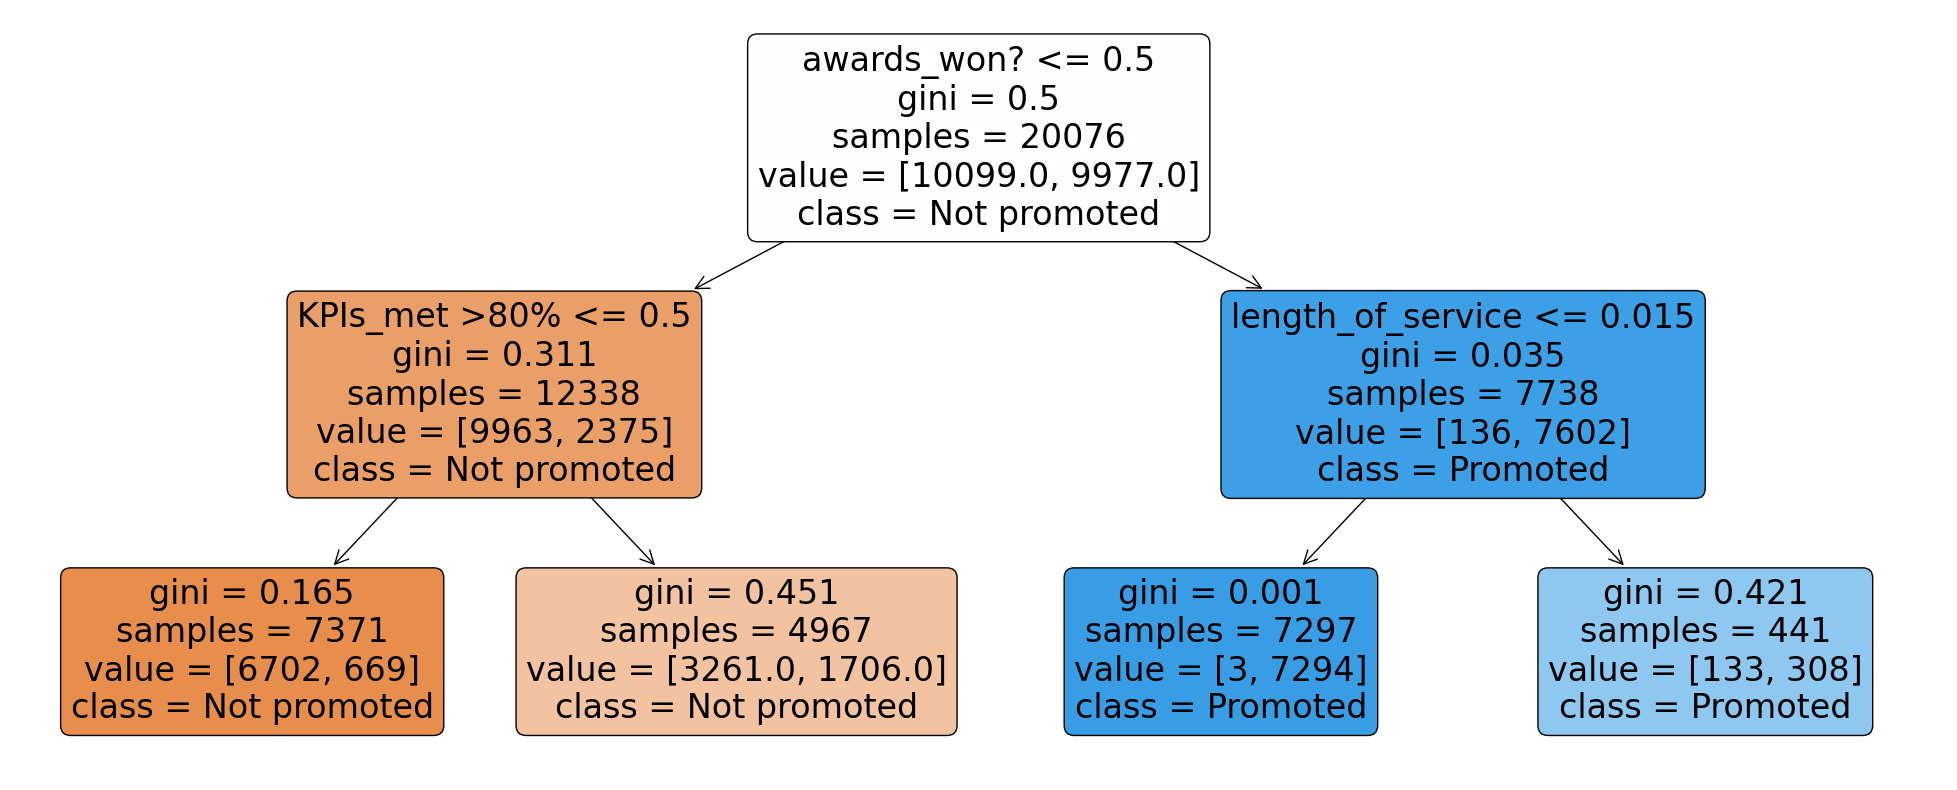

In [20]:
plt.figure(figsize=(25,10))
tree.plot_tree(decision_tree,
              feature_names = list(df_hr_new.drop(['is_promoted'], axis=1)),
                class_names = ['Not promoted', 'Promoted'],
                rounded = True,
                filled= True)

plt.savefig('decision_tree.png',format='png')
plt.show()              

In [21]:
## Evaluating model, decision_tree, using simple train & test split
print('\n~Using simple train & test split')
print('decision_tree Training Accuracy: ', decision_tree.score(X_train, y_train)) # Calculate & print out the training accuracy
print('decision_tree Testing Accuracy: ', decision_tree.score(X_test, y_test)) # Calculate the testing accuracy

## Evaluating model, decision_tree, using K-folds Cross Validation
results  = cross_validate(decision_tree, X, y, scoring='accuracy', cv=5, return_train_score = True)
print('\n~Using k-folds cross validation')
print('decision_tree Train Scores: ', results['train_score'])
print('decision_tree Test Scores: ', results['test_score'])
print('decision_tree Mean Cross Val Training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('decision_tree Mean Cross Val Testing accuracy is:', sum(results['test_score'])/len(results['test_score']))


~Using simple train & test split
decision_tree Training Accuracy:  0.8749252839210998
decision_tree Testing Accuracy:  0.8709902370990237

~Using k-folds cross validation
decision_tree Train Scores:  [0.87508717 0.87225418 0.87386681 0.87482566 0.87269003]
decision_tree Test Scores:  [0.86837517 0.87970711 0.87325662 0.8694212  0.87796374]
decision_tree Mean Cross Val Training accuracy is: 0.873744769874477
decision_tree Mean Cross Val Testing accuracy is: 0.873744769874477


##### 1.2.3 Artificial Neutral Network Classifier Model (mlp)

In [23]:
# Create Artificial Neural Network Classifier Model (mlp)
mlp = MLPClassifier(activation ='logistic', hidden_layer_sizes=(10,), max_iter= 2000, solver = 'sgd', random_state=2)

# Fit the model, mlp, to the training set
mlp.fit(X_train,y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(10,), max_iter=2000,
              random_state=2, solver='sgd')

In [24]:
# Print out the model, mlp, coefficients (weight) & intercept (bias)
print('mlp Coefficients', mlp.coefs_) 
print('mlp Intercepts', mlp.intercepts_) 

mlp Coefficients [array([[ 0.01445726,  0.26949583, -0.27845916, -0.03779485, -0.01829494,
         0.23202241, -0.01481563, -0.41026002,  0.4205766 , -0.43098791],
       [ 0.01380268,  0.56463021, -0.30002554,  0.16514351, -0.00908894,
         0.3349649 , -0.02632054, -0.48893034,  0.63182459, -0.40567324],
       [ 0.0384203 ,  0.10138645, -0.27127464, -0.36591261, -0.20805924,
         0.26132727, -0.22944418, -0.50720902,  0.12388034, -0.3384752 ],
       [ 0.05537955,  0.11362454, -0.0862007 , -0.12835154, -0.02067576,
         0.09392117,  0.00870717, -0.13920491,  0.00813174, -0.05905571],
       [ 0.15990488,  0.27678044,  0.0582574 , -0.17435383,  0.09776296,
         0.11025876,  0.11904376, -0.06622055,  0.22384828,  0.07035376],
       [-0.48165569, -0.71291822,  0.23006517,  0.37944064,  0.36378956,
        -0.52374747,  0.3152377 ,  0.70527596, -0.41497009,  0.78742592],
       [ 0.62641674,  0.48614168, -0.12726681, -0.40797175, -0.46890146,
         0.24959181, -0.566

In [25]:
## Evaluating model, mlp, using simple train & test split
print('\n~Using simple train & test split')
print('mlp Training Accuracy:', mlp.score(X_train,y_train)) # Calculate & print out the testing accuracy
print('mlp Testing Accuracy:', mlp.score(X_test,y_test)) # Calculate & print out the testing accuracy

## Evaluating model, evc, using K-folds Cross Validation
results  = cross_validate(mlp, X, y, scoring='accuracy', cv=5, return_train_score = True)
print('\n~Using k-folds cross validation')
print('mlp Train Scores: ', results['train_score'])
print('mlp Test Scores: ', results['test_score'])
print('mlp Mean Cross Val Training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('mlp Mean Cross Val Testing accuracy is:', sum(results['test_score'])/len(results['test_score']))


~Using simple train & test split
mlp Training Accuracy: 0.8710898585375573
mlp Testing Accuracy: 0.8683170618317062

~Using k-folds cross validation
mlp Train Scores:  [0.87051081 0.8702493  0.87099024 0.87491283 0.87133891]
mlp Test Scores:  [0.86314505 0.8777894  0.8722106  0.86558577 0.87604603]
mlp Mean Cross Val Training accuracy is: 0.8716004184100419
mlp Mean Cross Val Testing accuracy is: 0.870955369595537


### 1.3 Evaluate & Improve the Model(s)

##### Comparing the testing accuracies  (simple train & test split)
lg Testing Accuracy:  0.7215280257051053 <br>
decision_tree Testing Accuracy:  0.682256337022492 <br>
mlp Testing Accuracy: 0.732238486254909

##### Comparing the testing accuracies  (k-folds cross validation)
lg Mean Cross Val Testing accuracy is: 0.7266521845902444 <br>
decision_tree Mean Cross Val Testing accuracy is: 0.6902311394479368 <br>
mlp Mean Cross Val Testing accuracy is: 0.742932815558937

##### 1.3.1 Improved Logistic Regression Model (lg2)

In [29]:
# Create another model, lg2, using statsmodel.api: the Logit method & fit function
lg2 = sm.Logit(y_train, X_train).fit()

         Current function value: 0.263686
         Iterations: 35


C:\Users\julia\anaconda3.2\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [30]:
# Print out the model, lg2, summary
lg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            is_promoted   No. Observations:                20076
Model:                          Logit   Df Residuals:                    20064
Method:                           MLE   Df Model:                           11
Date:                Sun, 08 Sep 2024   Pseudo R-squ.:                  0.6196
Time:                        10:49:12   Log-Likelihood:                -5293.8
converged:                      False   LL-Null:                       -13915.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
department              -0.1279      0.013     -9.961      0.000      -0.153      -0.103
region                  -0.0131      0.003     -5.235      0.000      -0.018      -0.008
education               -0.4053      0.048     -8.357      0.000      -0.500      -0.310
gender                  -0.0504      0.052     -0.976      0.329      -0.152       0.051
recruitment_channel     -0.0096      0.044     -0.216      0.829      -0.096       0.077
no_of_trainings         22.4656   3651.797      0.006      0.995   -7134.925    7179.856
age                     -5.8733      0.228    -25.756      0.000      -6.320      -5.426
previous_year_rating     1.1732      0.091     12.843      0.000       0.994       1.352
length_of_service        1.3622      0.233      5.842      0.000       0.905       1.819
KPIs_met >80%            1.3856      0.053     26.338      0.000       1.282       1.489
awards_won?              2.0522      0.116     17.715      0.000       1.825       2.279
avg_training_score       4.6250      0.182     25.401      0.000       4.268       4.982
========================================================================================

Possibly complete quasi-separation: A fraction 0.36 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [31]:
# Build the improved model, lg2, using features with p-values equals or less than 0.05 

# Define Model Inputs (X) and Output (y) ~ Remove recruitment_channel variable
lg2_X = df_hr_new.drop(['is_promoted', 'recruitment_channel'],axis=1)
lg2_y = df_hr_new['is_promoted'] 

# Split both Inputs (X) and Ouput (y) into training set (70%) and testing set (30%)
lg2_X_train, lg2_X_test, lg2_y_train, lg2_y_test = train_test_split(lg2_X, lg2_y, test_size=0.3, random_state=1)

In [32]:
# Create Improved Logistic Regression Model (lg2)
lg2 = LogisticRegression(solver='lbfgs', max_iter=10000)

# Fit the model, lg2, to the training set
lg2.fit(lg2_X_train,lg2_y_train)

LogisticRegression(max_iter=10000)

In [33]:
# Print out the model, lg2, coefficients & intercept
print('\nlg2 Coefficients: ', lg2.coef_)
print('lg2 Intercept (β0): ', lg2.intercept_)

# Calculate & print out the fitted values for training set
print('\ny Fitted : ', lg2.predict(lg2_X_train)) # returns 0 or 1
print('y Fitted probabilities: ', lg2.predict_proba(lg2_X_train)[:,0]) # returns probabilities


## Evaluating model, lg2, using simple train & test split
print('\n~Using simple train & test split')
print('lg2 Training Accuracy: ', lg2.score(lg2_X_train, lg2_y_train)) # Calculate & print out the training accuracy
print('lg2 Testing Accuracy: ', lg2.score(lg2_X_test, lg2_y_test)) # Calculate the testing accuracy


## Evaluating model, lg2, using K-folds Cross Validation
results  = cross_validate(lg2, lg2_X, lg2_y, scoring='accuracy', cv=5, return_train_score = True)
print('\n~ Using k-folds cross validation')
print('lg2 Train Scores: ', results['train_score'])
print('lg2 Test Scores: ', results['test_score'])
print('lg2 Mean Cross Val Training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('lg2 Mean Cross Val Testing accuracy is:', sum(results['test_score'])/len(results['test_score']))


lg2 Coefficients:  [[-1.19656369e-01 -1.12764093e-02 -2.64480267e-01 -6.02076612e-03
   6.20256766e+00 -3.41088766e+00  1.17434547e+00  7.09909780e-01
   1.39409300e+00  2.07763380e+00  4.57057411e+00]]
lg2 Intercept (β0):  [-2.26467527]

y Fitted :  [1 0 1 ... 1 0 1]
y Fitted probabilities:  [0.00090363 0.90179432 0.00090363 ... 0.00090363 0.73885405 0.00090363]

~Using simple train & test split
lg2 Training Accuracy:  0.8750249053596334
lg2 Testing Accuracy:  0.8700604370060437

~ Using k-folds cross validation
lg2 Train Scores:  [0.87395397 0.87229777 0.87343096 0.87539226 0.87282078]
lg2 Test Scores:  [0.87273361 0.8791841  0.86976987 0.86854951 0.87482566]
lg2 Mean Cross Val Training accuracy is: 0.8735791492329149
lg2 Mean Cross Val Testing accuracy is: 0.8730125523012552


##### 1.3.2 Improved Decision Tree Model (decision_tree2)

In [35]:
# Use GridSearch to find the best combination of model, decision_tree2, hyperparameters for decision_tree2
dt = tree.DecisionTreeClassifier(max_depth = 2)
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10, 12, 16], 'max_depth' : [2,3,4,5,6,7]}
gs = GridSearchCV(dt, param_grid=param_grid, scoring='accuracy', cv= 10, n_jobs=-1)
gs = gs.fit(X_train, y_train) 

print('best score for decision_tree2: ', gs.best_score_)
print('best parameters for decision_tree2: ', gs.best_params_)

best score for decision_tree2:  0.8983362762204793
best parameters for decision_tree2:  {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 10, 'min_samples_split': 2}


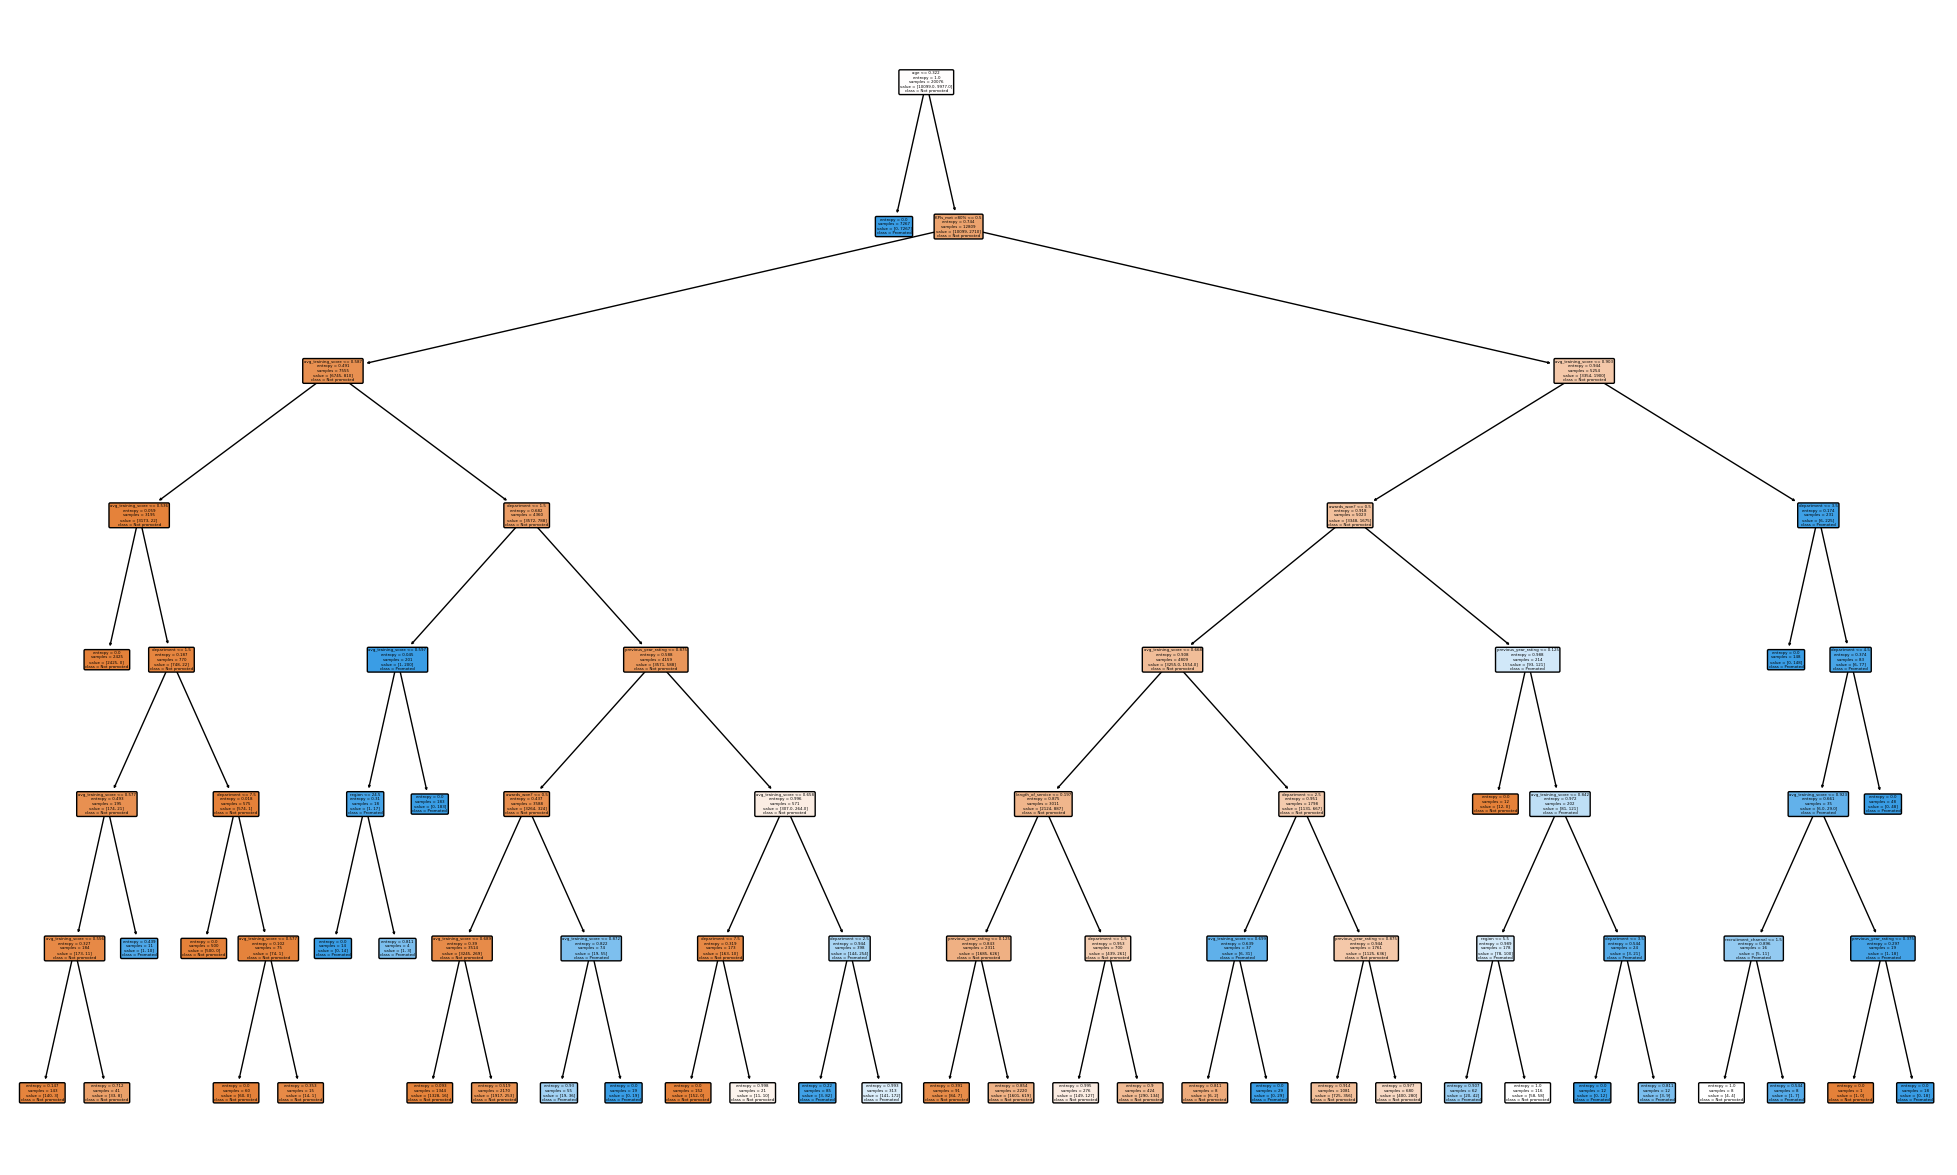

In [36]:
# Build the improved model, decision_tree2, using the above suggested hyperparameter values
decision_tree2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 7, min_samples_leaf = 1, min_samples_split =12, random_state=1)
decision_tree2.fit(X_train, y_train)

plt.figure(figsize=(25,15))
tree.plot_tree(decision_tree2,
              feature_names = list(df_hr_new.drop(['is_promoted'], axis=1)),
                class_names = ['Not promoted', 'Promoted'],
                rounded = True,
                filled= True)

plt.savefig('decision_tree2.png',format='png')
plt.show() 

In [37]:
## Evaluating model using simple train & test split
print('\n~Using simple train & test split')
print('decision_tree2 Training Accuracy: ', decision_tree2.score(X_train, y_train)) # Calculate & print out the training accuracy
print('decision_tree2 Testing Accuracy: ', decision_tree2.score(X_test, y_test)) # Calculate the testing accuracy

## Evaluating model using K-folds Cross Validation
results  = cross_validate(decision_tree2, X, y, scoring='accuracy', cv=5, return_train_score = True)
print('\n~Using k-folds cross validation')
print('decision_tree2 Train Scores: ', results['train_score'])
print('decision_tree2 Test Scores: ', results['test_score'])
print('decision_tree2 Mean Cross Val Training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('decision_tree2 Mean Cross Val Testing accuracy is:', sum(results['test_score'])/len(results['test_score']))


~Using simple train & test split
decision_tree2 Training Accuracy:  0.8970412432755529
decision_tree2 Testing Accuracy:  0.8944676894467689

~Using k-folds cross validation
decision_tree2 Train Scores:  [0.89936367 0.89618201 0.89918933 0.89657427 0.89657427]
decision_tree2 Test Scores:  [0.89435146 0.90394003 0.89382845 0.89051604 0.89853556]
decision_tree2 Mean Cross Val Training accuracy is: 0.8975767085076708
decision_tree2 Mean Cross Val Testing accuracy is: 0.896234309623431


##### 1.3.3 Improved Artificial Neutral Network Classifier Model (mlp2)

In [39]:
# Use GridSearch to find the best combination of model hyperparameters for mlp2
param_grid = { "activation" : ["identity", "logistic", "tanh", "relu"],
              "hidden_layer_sizes" : [5,2], 
              "max_iter" : [200, 2000, 4000],
              'solver' : ["lbfgs", "sgd", "adam"]}
gs = GridSearchCV(mlp, param_grid=param_grid, scoring='accuracy', cv= 10, n_jobs=-1)
gs = gs.fit(X_train, y_train) 

print('best score for mlp2: ', gs.best_score_)
print('best parameters for mlp2: ', gs.best_params_)

best score for mlp2:  0.902670707305308
best parameters for mlp2:  {'activation': 'tanh', 'hidden_layer_sizes': 5, 'max_iter': 4000, 'solver': 'lbfgs'}


In [40]:
# Build the improved model, mlp2, using the above suggested hyperparameter values
mlp2 = MLPClassifier(activation = 'tanh', hidden_layer_sizes=(5,), max_iter= 4000, solver = 'lbfgs', random_state=2)
mlp2.fit(X_train, y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(5,), max_iter=4000,
              random_state=2, solver='lbfgs')

In [41]:
## Evaluating model, mlp2, using simple train & test split
print('\n~Using simple train & test split')
print('mlp2 Training Accuracy:', mlp2.score(X_train,y_train)) # Calculate & print out the testing accuracy
print('mlp2 Testing Accuracy:', mlp2.score(X_test,y_test)) # Calculate & print out the testing accuracy


## Evaluating model, mlp2, using K-folds Cross Validation
results  = cross_validate(mlp2, X, y, scoring='accuracy', cv=5, return_train_score = True)
print('\n~Using k-folds cross validation')
print('mlp2 Train Scores: ', results['train_score'])
print('mlp2 Test Scores: ', results['test_score'])
print('mlp2 Mean Cross Val Training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('mlp2 Mean Cross Val Testing accuracy is:', sum(results['test_score'])/len(results['test_score']))


~Using simple train & test split
mlp2 Training Accuracy: 0.9066547120940427
mlp2 Testing Accuracy: 0.905160390516039


C:\Users\julia\anaconda3.2\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\julia\anaconda3.2\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\julia\anaconda3.2\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 


~Using k-folds cross validation
mlp2 Train Scores:  [0.90934449 0.9042887  0.90664226 0.89474372 0.89422071]
mlp2 Test Scores:  [0.9042887  0.91073919 0.90585774 0.8917364  0.89504881]
mlp2 Mean Cross Val Training accuracy is: 0.9018479776847977
mlp2 Mean Cross Val Testing accuracy is: 0.9015341701534171


### 1.4 Conclusion
##### Simple Train & Test Split Results:
Logistic Regression (lg2): Testing Accuracy = 0.7208 <br>
Decision Tree (decision_tree2): Testing Accuracy = 0.7897 <br>
Multi-Layer Perceptron (mlp2): Testing Accuracy = 0.7922 <br>

##### K-Folds Cross Validation Results: 
Logistic Regression (lg2): Mean Cross-Validation Accuracy = 0.7264 <br>
Decision Tree (decision_tree2): Mean Cross-Validation Accuracy = 0.7947 <br>
Multi-Layer Perceptron (mlp2): Mean Cross-Validation Accuracy = 0.8032 <br>

##### Interpretation of Overall Performance:
* The Multi-Layer Perceptron (mlp2) consistently shows the highest accuracy in both the simple train-test split and k-folds cross-validation. This suggests that the MLP model is the most effective at predicting which employees are likely to get promoted.
* The Decision Tree (decision_tree2) model also performs well, particularly in cross-validation, where its accuracy is close to that of the MLP model. This indicates that it is a robust model, though slightly less accurate than MLP.
* The Logistic Regression (lg2) model has the lowest accuracy among the three models, indicating it is less effective at capturing the complex patterns needed to accurately predict promotions.

##### Conclusion:
The Multi-Layer Perceptron (MLP) model is the most effective model in this HR analytics project for predicting employee promotions, followed by the Decision Tree model. Logistic Regression, while still useful, performs the least well in this context. The use of cross-validation confirms the robustness and reliability of the MLP model as the best choice.

### 1.5 Overview of Techniques used